In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas import Series
import warnings

In [2]:
#importamos archivos
entrenamiento = pd.read_csv("Train_SU63ISt.csv")
prueba = pd.read_csv("Test_0qrQsBz.csv")
#Creamos copia 
entrenamiento_original = entrenamiento.copy()
prueba_original = prueba.copy()

In [3]:
#Características de datos
entrenamiento.columns, prueba.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [4]:
#Característica de cada columna
entrenamiento.dtypes, prueba.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [5]:
#Observamos las dimensiones
entrenamiento.shape, prueba.shape

((18288, 3), (5112, 2))

Tenemos 18288 y 5112 filas, 3 y 2 columnas para los conjuntos de entrenamiento y prueba respectivamente. 

A continuación extraeremos la información para encontrar las relaciones en nuestro conjunto de datos. Como se verificó anteriormente nuestra columna "Datetime" es un objeto por lo que que tendremos que cambiar el tipo de dato para poder extraer información de esta columna.

In [6]:
#Transformamos la columna Datetime a formate date time
entrenamiento["Datetime"] = pd.to_datetime(entrenamiento.Datetime, format="%d/%m/%Y %H:%M")
prueba["Datetime"] = pd.to_datetime(prueba.Datetime, format="%d/%m/%Y %H:%M")
entrenamiento_original["Datetime"] = pd.to_datetime(entrenamiento_original.Datetime, format="%d/%m/%Y %H:%M")
prueba_original["Datetime"] = pd.to_datetime(prueba_original.Datetime, format="%d/%m/%Y %H:%M")

In [7]:
#Extraemos el años, mes, día y hora 

In [8]:
for i in (entrenamiento, prueba, entrenamiento_original, prueba_original):
    i["año"]=i.Datetime.dt.year
    i["mes"]=i.Datetime.dt.month
    i["dia"]=i.Datetime.dt.day
    i["hora"]=i.Datetime.dt.hour

# Hipótesis

Si observamos los datos podemos darnos cuenta que con el paso de los años aumenta el flujo de personas. Además durante un año tendremos flujos más altos en los meses de mayo y octubre, asimismo durante los días de la semana tendremos más gente en los fines de semana y días festivos, también podemos identificar las horas pico.

In [9]:
#Observamos 10 primeros datos
entrenamiento[:20] #observar primeros 20 datos

,ID,Datetime,Count,año,mes,dia,hora
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
5,5,2012-08-25 05:00:00,2,2012,8,25,5
6,6,2012-08-25 06:00:00,2,2012,8,25,6
7,7,2012-08-25 07:00:00,2,2012,8,25,7
8,8,2012-08-25 08:00:00,6,2012,8,25,8
9,9,2012-08-25 09:00:00,2,2012,8,25,9


Anteriormente supusimos que hay un mayor flujo en el fin de semana para verificar dicha hipótesis crearemos una nueva variable para asignar los días fin de semana. En este caso observando los datos podemos deducir que los sábodos y domingo corresponden a los días 5 y 6.

In [10]:
entrenamiento["dia semana"] = entrenamiento["Datetime"].dt.dayofweek
temporal = entrenamiento["Datetime"]

Ahora verificaremos si efectivamente es sábado o domingo

In [11]:
def finde(fila):
    if fila.dayofweek == 5 or fila.dayofweek == 6:
        return 1
    else:
        return 0

In [12]:
temporal2 = entrenamiento["Datetime"].apply(finde)
entrenamiento["Fin de semana"] = temporal2

In [13]:
entrenamiento.head()

,ID,Datetime,Count,año,mes,dia,hora,dia semana,Fin de semana
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


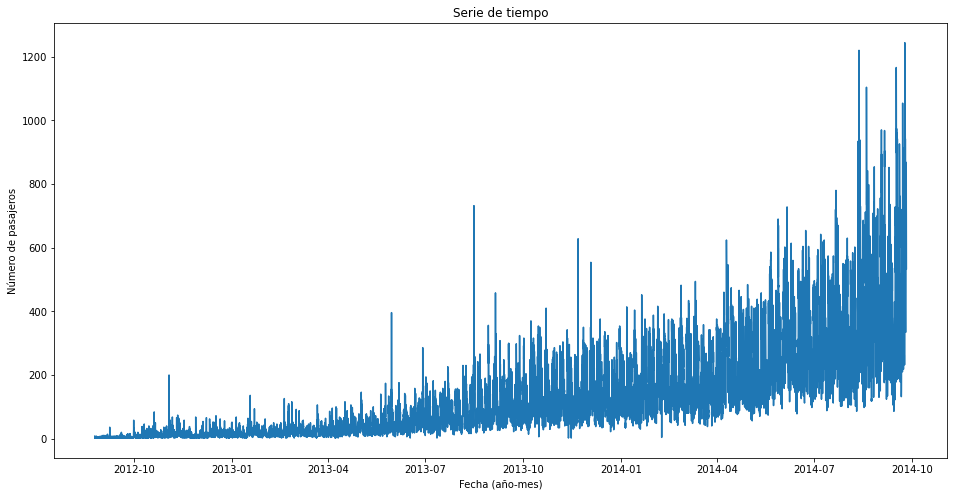

In [14]:
#Graficamos

entrenamiento.index = entrenamiento["Datetime"] #Indice por fechas (eje x)
df = entrenamiento.drop("ID",1)
ts = entrenamiento["Count"]

plt.figure(figsize=(16,8))
plt.plot(ts)
plt.title("Serie de tiempo")
plt.xlabel("Fecha (año-mes)")
plt.ylabel("Número de pasajeros");

Ahora que conocemos un poco más de nuestros datos podemos comprobrar nuestra hipótesis. Recordemos que una de nuestras primeras hipótesis era que el flujo aumentaba con el paso de los años. 

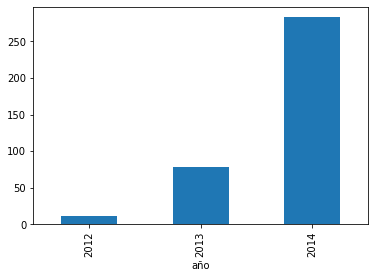

In [15]:
#Histograma por año

entrenamiento.groupby("año")["Count"].mean().plot.bar();

Es fácil ver que la hipótesis se cumple. Incluso podríamos afirmar que el aumento es exponencial. La siguiente hipótesis consistía en un aumento de flujo en los meses de mayo y octubre.

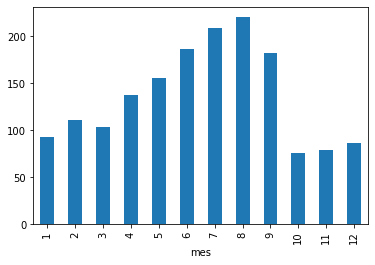

In [16]:
entrenamiento.groupby("mes")["Count"].mean().plot.bar();

Se puede ver un aumento en los primeros 8 meses con una caída bastante brusca a partir del noveno mes. Investiguemos un poco más a fondo porque sucede esto

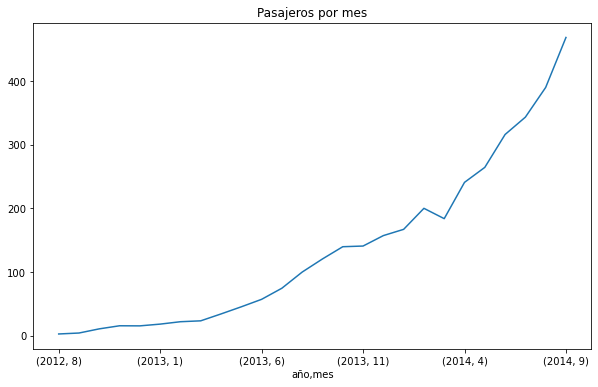

In [17]:
comportamiento = entrenamiento.groupby(["año","mes"])["Count"].mean() 

plt.figure(figsize=(10,6))
plt.title("Pasajeros por mes")
comportamiento.plot()

Podemos darnos cuenta que los últimos 3 meses del año 2014 no están presentes por lo que al calcular la media tendremos números bajos ya que en el 2012 estos años son muy bajos.

Anteriormente confirmamos la hipótesis del aumento de pasajeros por año, por lo que la media es más grande para el 2014 (en cuestión de años) y menos para estos tres meses.

Igualmente de la gráfica anterior podemos deducir un aumento en el número de pasajeros en la escala mensual. Lo que es de esperarse ya que por año sucede lo mismo.

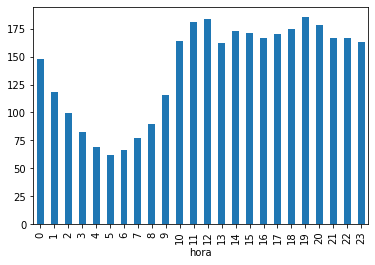

In [18]:
#Grafica por hora

entrenamiento.groupby("hora")["Count"].mean().plot.bar();

Podemos ver de la gráfica que la hora pico en el transporte corresponde a las 7pm

In [19]:
#Verificamos 
entrenamiento.groupby("hora")["Count"].mean().argmax(),entrenamiento.groupby("hora")["Count"].mean().max()

(19, 185.51443569553805)

Efectivamente podemos las 7pm es la hora con mayor flujo de pasajeros con un promedio de 185.51.

Ahora enfoquemenos en la hipótesis del aumento entre días de la semana.

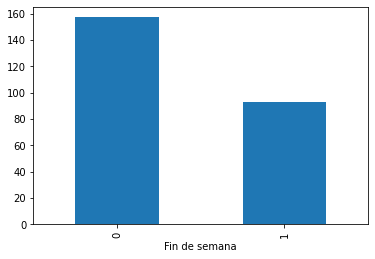

In [20]:
entrenamiento.groupby("Fin de semana")["Count"].mean().plot.bar();

Podemos concluir que efectivamente de lunes a viernes hay un mayor flujo de pasajeros que en fin de semana.

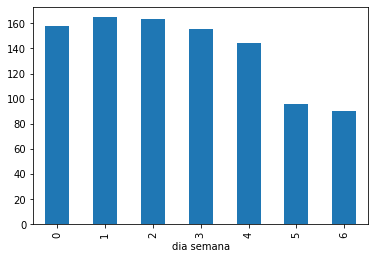

In [21]:
#Grafica por dia

entrenamiento.groupby("dia semana")["Count"].mean().plot.bar();


En este caso 0 representa el lunes y 6 el domingo. De la gráfica se puede ver que el día con el mayor flujo es el martes, seguido de lunes. Los días con menor flujo fectivamente son los del fin de semana.

## Modelado

Para empezar con el modelado primero necesitamos eliminaremos toda la información irrelevante de nuestro dataframe.

In [22]:
entrenamiento = entrenamiento.drop("ID",1)

De la gráfica se puede notar bastante ruido en la gráfica de horas, por lo que agregaremos dichos datos a las series por día, semana y mes. Esto lo hacemos para que sea más fácil modelar los datos.

In [23]:
entrenamiento.Timestamp = pd.to_datetime(entrenamiento.Datetime, format="%d-%m-%Y %H:%M")

#Promedio por hora
hora = entrenamiento.resample("H").mean()

#Promedio por día
dia = entrenamiento.resample("D").mean()

#Promedio por semana

semana = entrenamiento.resample("W").mean()

#Promedio por mes

mes = entrenamiento.resample("M").mean()

<ipython-input-23-9adde07ddd25>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  entrenamiento.Timestamp = pd.to_datetime(entrenamiento.Datetime, format="%d-%m-%Y %H:%M")


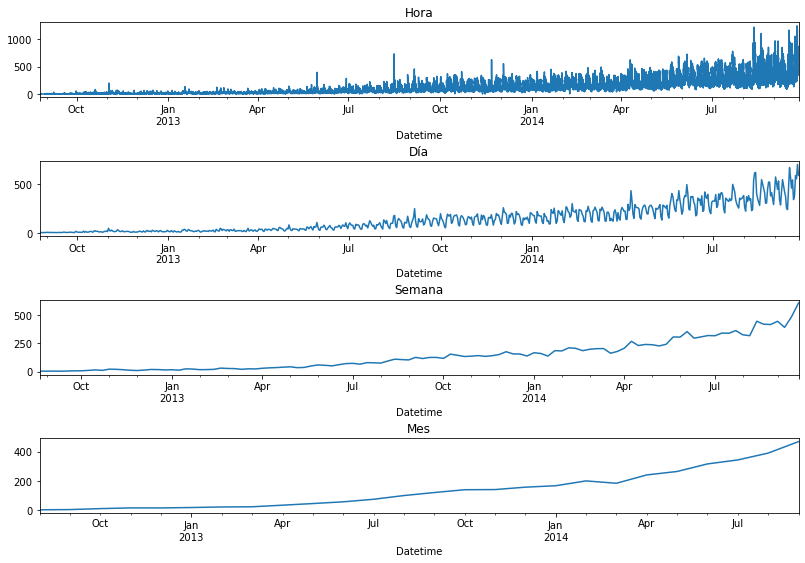

In [24]:
#Graficamos

fig, axs = plt.subplots(4,1)
fig.tight_layout()
hora.Count.plot(figsize=(12,8), title="Hora", ax=axs[0])
dia.Count.plot(figsize=(12,8), title="Día", ax=axs[1])
semana.Count.plot(figsize=(12,8), title="Semana", ax=axs[2])
mes.Count.plot(figsize=(12,8), title="Mes", ax=axs[3]);

Podemos darnos cuentas que las series comienza a ser más estables, lo que hace más fácíl identiicar patrones. Sin embargo es complicado transformar las series mensual y semana a horas por lo que trabajaremos sobre los días.

In [25]:
prueba.Timestamp = pd.to_datetime(prueba.Datetime, format="%d-%m-%Y %H:%M")
prueba.index = prueba.Timestamp

#Calculamos promedios

prueba = prueba.resample("D").mean()
entrenamiento.Timestamp = pd.to_datetime(entrenamiento.Datetime, format="%d-%m-%Y %H:%M")
entrenamiento.index = entrenamiento.Timestamp

#Promedio de nuevo

entrenamiento = entrenamiento.resample("D").mean()

<ipython-input-25-2c8dcb856c6f>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  prueba.Timestamp = pd.to_datetime(prueba.Datetime, format="%d-%m-%Y %H:%M")


Dado que ya hemos validado nuestras hipótesis podemos comenzar a construir nuestras modelos predictivos de series de tiempo. Para esto primero necesitamos una serie de datos con los cuales validaremos nuestros modelos además de verificar su rendimiento. Los datos tienen que tener las siguientes características.

<ul>
    <li> El conjunto de datos ttiene que consistir de valor de las variables dependientes.</li>
    <li> El modelo no debe de ser entrenado en el conjunto de validación </li>
</ul>

Por dichas razones tenemos que divir nuestre conjunto de datos en dos partes. La primera será pra entrenar al modelo y el segundo para probarlo. 

Existen diferentes maneras de dividir el los datos pero para esta práctica utilizaremos de la siguiente:

<b> Paso 1 </b>

Tomaremos los últimos 3 meses como el conjunto de validación y el resto para entrenamiento. En este caso solo tomamos 3 meses porque si tomamos más tendremos muy pocos datos para entrenar al modelo.  

De antemano conocemos que la fecha inicial es 25-08-2012 y la última fecha es 25-09-2014. Entonces:        

In [36]:
#Entrenamiento y validacion
entrenamiento2 = entrenamiento.loc['2012-08-25':'2014-06-24'] 
validacion = entrenamiento.loc['2014-06-24':'2014-09-25'] 

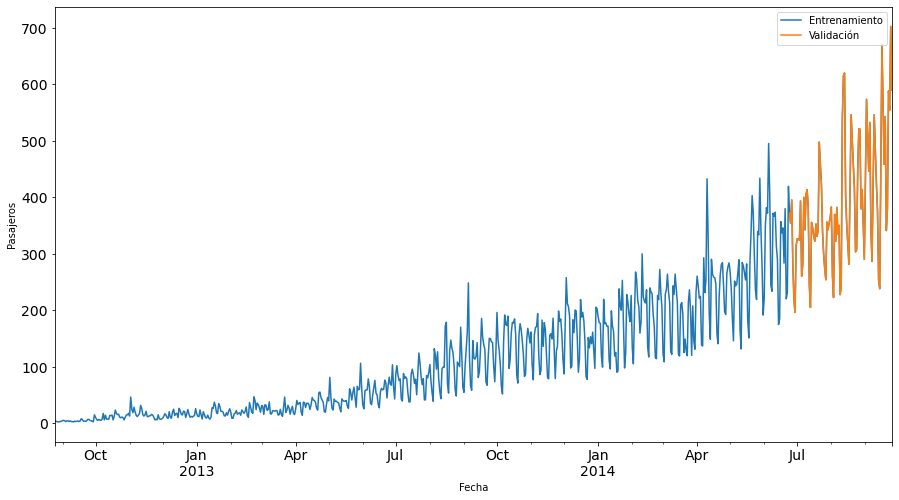

In [37]:
#Grafiquemos

entrenamiento.Count.plot(figsize=(15,8), fontsize=14, label='Entrenamiento')
validacion.Count.plot(figsize=(15,8), fontsize=14, label="Validación")
plt.xlabel("Fecha")
plt.ylabel("Pasajeros")
plt.legend(loc="best");


La parte azul representa en conjunto de entrenamiento y la naranja el conjunto de prueba. A continuación discutiremos diferentes enfoques

<ul>
    <li>Enfoque "ingenuo" </li>
    <li>Media móvil </li>
    <li>Suavizamiento exponencial simple </li>
    <li>Modelo exponencial de Holt </li>
</ul>

### Enfoque ingenuo

En esta técnica asumimos que el siguiente esperado es igual al último punto observado. Supongamos que para 5 días tenemos los siguiente datos


<table style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Día </th><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Pasajeros</th></tr></thead><tbody><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">1</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">10</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">2</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">12</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">3</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">14</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">4</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">13</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">5</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">15</td></tr></tbody></table>


La predicción para los dos siguientes día será 
<table style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Día </th><th style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">Pasajeros</th></tr></thead><tbody><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">1</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">10</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">2</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">12</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">3</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">14</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">4</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">13</td></tr><tr><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">5</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">15</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">6</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">15</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">7</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">15</td></tr></tbody></table>


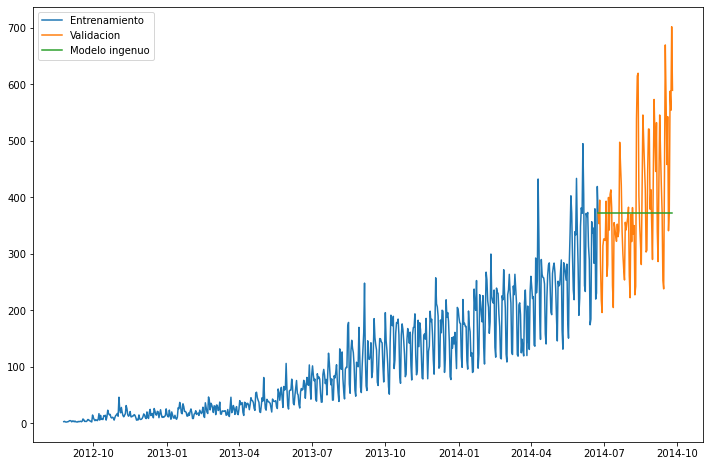

In [52]:
#Enfoque ingenuo

dd = np.asarray(entrenamiento2.Count)
y_hat = validacion.copy()
y_hat["ingenuo"] = dd[len(dd)-1]

#Graficamos
plt.figure(figsize=(12,8))
plt.plot(entrenamiento2.index, entrenamiento2['Count'], label="Entrenamiento")
plt.plot(validacion.index,validacion['Count'],label="Validacion")
plt.plot(y_hat.index,y_hat["ingenuo"],label="Modelo ingenuo")
plt.legend(loc="best");


Ahora para calcular la precisión de nuestro modelo utilizaremos error cuadrático medio la cual consiste de la desviación estándar de los residuos. Estos son una medida de que tan lejos los puntos predichos se encuentran de los esperados. EL RMSE (por sus siglas en inglés está dado por):

$RMSE = \sqrt{\sum_{i=1}^{N}\frac{(x_{i}-\hat{x_{i}})}{N}} $

Donde N es el número de datos, $x_i$ son los datos observados y $\hat{x_i}$ los datos teóricos.

In [57]:
#Callamos lel RMSE
#Importamos librerías necesarias

from sklearn.metrics import mean_squared_error

rms = np.sqrt(mean_squared_error(validacion.Count, y_hat.ingenuo))
print(rms)

111.19428439887872


Dado que el valor de RMSE es bastante alto podemos afirmar que el método no es adecuado.

### Media móvil

<ul>
    <li> En esta técnica tomaremos el promedio de pasajeros</li>
</ul>


Este técnica toma una cantidad de días para ese caso tomaeremos 50 días.

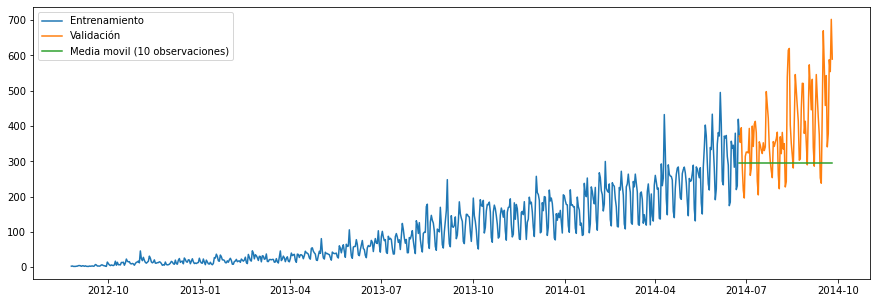

In [62]:
#Media movil

y_hat_avg = validacion.copy()
y_hat_avg ["media_movil"] = entrenamiento2["Count"].rolling(50).mean().iloc[-1]

#Graficamos

plt.figure(figsize=(15,5))
plt.plot(entrenamiento2["Count"], label="Entrenamiento")
plt.plot(validacion["Count"], label="Validación")
plt.plot(y_hat_avg["media_movil"], label="Media movil (10 observaciones)")
plt.legend(loc="best");

In [65]:
rms = np.sqrt(mean_squared_error(validacion.Count, y_hat_avg["media_movil"]))
print(rms)

143.6342031438403


Igualmente tenemos un error bastante alto para la naturaleza de nuestro datos.


### Suavizamiento exponencial simple

<ul>
    <li> En este técnica asignamos un mayor peso a las observaciones recientes</li>
    <li> Estos pesos decaerán exponencialmente mientras más viejas sean.
</ul>

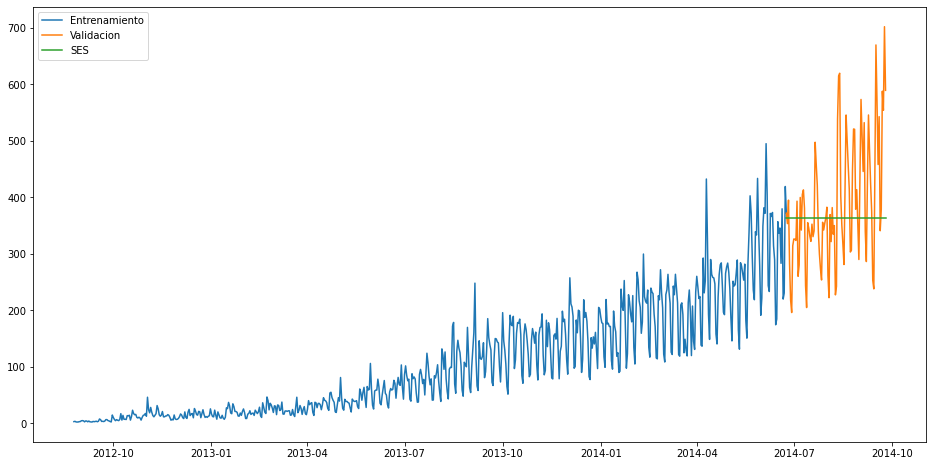

In [79]:
#Suavizamiento exponencial simple
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = validacion.copy()
fit2 = SimpleExpSmoothing(np.asarray(entrenamiento2["Count"])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg["SES"] = fit2.forecast(len(validacion))
plt.figure(figsize=(16,8))
plt.plot(entrenamiento2["Count"], label="Entrenamiento")
plt.plot(validacion["Count"], label="Validacion")
plt.plot(y_hat_avg["SES"], label="SES")
plt.legend(loc="best");

In [81]:
rms = np.sqrt(mean_squared_error(validacion.Count, y_hat_avg.SES))
print(rms)

112.83560152956802


### Modelo exponencial de Holt

<ul>
    <li>Es una versión un poco más compleja del suavizamiento exponencial</li>
    <li> Esté método a diferencial del suavizamiento exponencial toma en cuenta la tendencia del conjunto de datos</li>
<ul>
    
    
Primero observamos la tendencia de nuestros datos además de su error. Por lo que dividiremos nuestra serie en cuatro partes.
 
<ul>
    <li>Observada (serie original)</li>
    <li>Tendencia la cual puede ser ascendente o descendente</li>
    <li>Temporada, nos habla de la estacionalidad</li>
    <li>Residual, la cual se obtiene eliminando tendencias y temporadas en la serie de tiempo</li>
<ul>
        
    
    


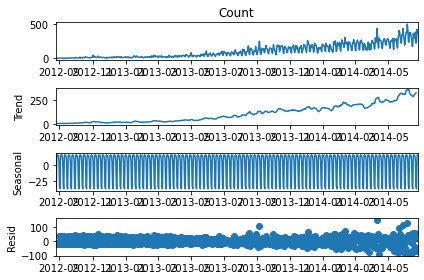

In [91]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(entrenamiento2.Count).plot()
resultados = sm.tsa.stattools.adfuller(entrenamiento.Count)
plt.show();

Se puede ver un comporatmiento ascendente en el conjunto de datos. Por dicha razón crearemos un modelo siguiendo dicha tendencia


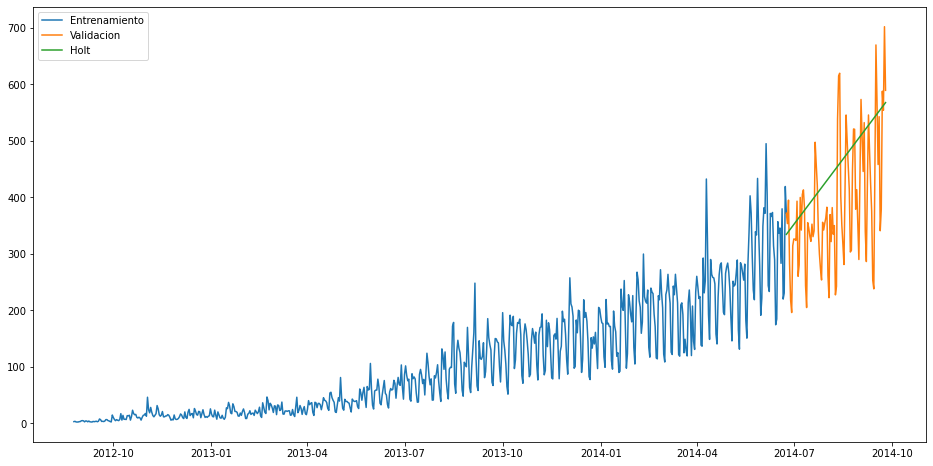

In [94]:
#Modelo

y_hat_avg = validacion.copy()
fit1 = Holt(np.asarray(entrenamiento2["Count"])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg["Holt"] = fit1.forecast(len(validacion))
plt.figure(figsize=(16,8))
plt.plot(entrenamiento2["Count"], label="Entrenamiento")
plt.plot(validacion["Count"], label="Validacion")
plt.plot(y_hat_avg["Holt"], label="Holt")
plt.legend(loc="best");

In [97]:
rms = np.sqrt(mean_squared_error(validacion.Count, y_hat_avg.Holt))
print(rms)

113.76729927347026
